In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Learnbay_Project')

In [ ]:
data = pd.read_csv('Ds_Data.csv')

In [ ]:
data

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,Carry out & Take away,1d,Male,26,Single,0,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,Carry out & Take away,1d,Male,26,Single,0,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,Coffee House,1d,Male,26,Single,0,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,Bar,1d,Male,26,Single,0,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

# **Handling Missing Data**

In [ ]:
print(data.isnull().sum())

destination                 0
passanger                   0
weather                     0
temperature                 0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Accept(Y/N?)                0
dtype: int64


In [ ]:
#Dropping 'car' column due to too many missing values
data_cleaned = data.drop(columns = ['car'])

In [ ]:
#Imputing missing values for categorical columns with mode
columns_with_missing_values = ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']
for column in columns_with_missing_values:
    data_cleaned[column].fillna(data_cleaned[column].mode()[0], inplace = True)

In [ ]:
print(data_cleaned.isnull().sum())

destination             0
passanger               0
weather                 0
temperature             0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Accept(Y/N?)            0
dtype: int64


# **Encoding Categorical Variables**

In [ ]:
data_cleaned.nunique()

,0
destination,3
passanger,4
weather,3
temperature,3
coupon,5
expiration,2
gender,2
age,8
maritalStatus,5
has_children,2


In [ ]:
# Columns for one-hot encoding
one_hot_columns = ['destination', 'passanger', 'weather', 'coupon', 'expiration', 'age', 'maritalStatus', 'education', 'occupation', 'income']

In [ ]:
data_encoded = pd.get_dummies(data_cleaned, columns = one_hot_columns, drop_first = True)

In [ ]:
# Label Encoding for binary categorical variables
label_encoder = LabelEncoder()
binary_columns = ['gender', 'direction_same', 'direction_opp']
for col in binary_columns:
    data_encoded[col] = label_encoder.fit_transform(data_encoded[col])

In [ ]:
data_encoded.head()

,temperature,gender,has_children,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,...,occupation_Transportation & Material Moving,occupation_Unemployed,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500
0,55,0,1,never,never,1~3,4~8,1~3,1,0,...,False,True,False,False,True,False,False,False,False,False
1,80,0,1,never,never,1~3,4~8,1~3,1,0,...,False,True,False,False,True,False,False,False,False,False
2,80,0,1,never,never,1~3,4~8,1~3,1,1,...,False,True,False,False,True,False,False,False,False,False
3,80,0,1,never,never,1~3,4~8,1~3,1,1,...,False,True,False,False,True,False,False,False,False,False
4,80,0,1,never,never,1~3,4~8,1~3,1,1,...,False,True,False,False,True,False,False,False,False,False


# **Exploratory Data Analysis(EDA)**

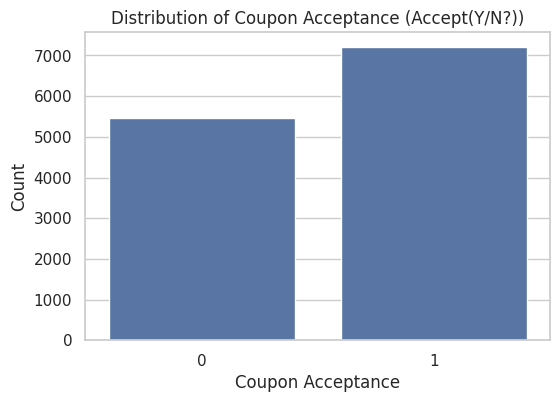

In [ ]:
sns.set(style="whitegrid")

# 3.1 Distribution of the target variable "Accept(Y/N?)"
plt.figure(figsize=(6,4))
sns.countplot(x=data_encoded['Accept(Y/N?)'])
plt.title('Distribution of Coupon Acceptance (Accept(Y/N?))')
plt.xlabel('Coupon Acceptance')
plt.ylabel('Count')
plt.show()

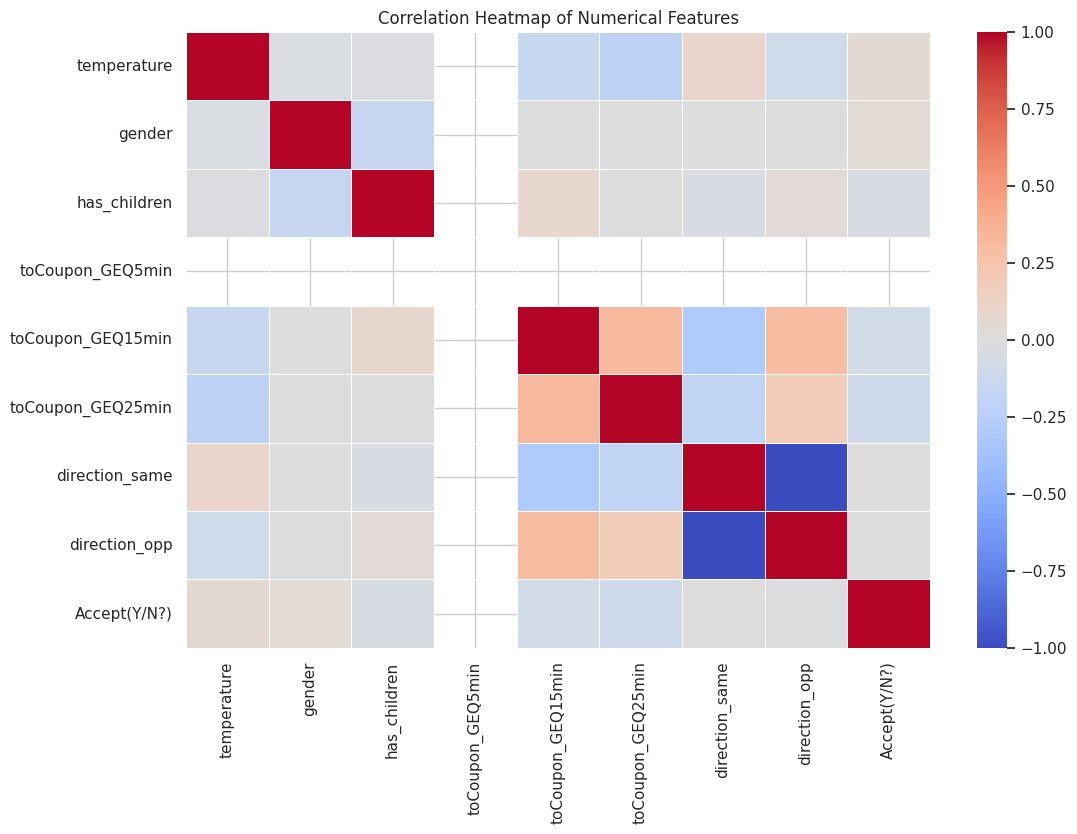

In [ ]:
numerical_columns = data_encoded.select_dtypes(include=['number'])

# Calculating the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

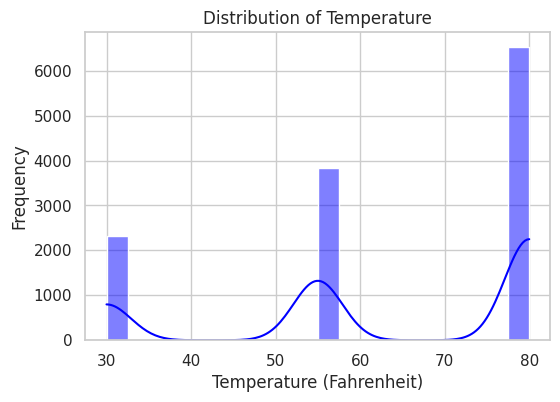

In [ ]:
# 3.3 Distribution of Temperature
plt.figure(figsize=(6,4))
sns.histplot(data_encoded['temperature'], kde=True, bins=20, color='blue')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Frequency')
plt.show()

# **Feature Selection**

In [ ]:
# 1. Correlation Check (Multicollinearity)

# Let's see the absolute correlation values to identify highly correlated features
correlation_matrix = numerical_columns.corr().abs()

# Selecting upper triangle of the correlation matrix
upper_tri = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
high_correlation_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

In [ ]:
print(f"Highly Correlated Features (correlation > 0.8): {high_correlation_features}")

Highly Correlated Features (correlation > 0.8): ['direction_opp']


In [ ]:
data_reduced = data_encoded.drop(columns=high_correlation_features)

In [ ]:
# 2. Feature Importance Using Random Forest

# Splitting the data into features (X) and target (y)
X = data_reduced.drop(columns=['Accept(Y/N?)'])
y = data_reduced['Accept(Y/N?)']

# Checking for non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns

# Re-encoding the remaining non-numeric columns.
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in non_numeric_cols:
    X[col] = label_encoder.fit_transform(X[col])

# Ensuring consistency of column names before splitting the data
X.columns = X.columns.str.replace('\[', '_', regex=True)
X.columns = X.columns.str.replace('\]', '_', regex=True)
X.columns = X.columns.str.replace('<', '_', regex=True)
X.columns = X.columns.str.replace('>', '_', regex=True)


# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Random Forest model to get feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Evaluate feature importance
importances = rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(10))

                         Feature  Importance
4                    CoffeeHouse    0.060560
3                            Bar    0.040819
23                 expiration_2h    0.038839
5                      CarryAway    0.038761
6           RestaurantLessThan20    0.038681
0                    temperature    0.036686
7               Restaurant20To50    0.036461
19  coupon_Carry out & Take away    0.034933
22        coupon_Restaurant(_20)    0.032884
20           coupon_Coffee House    0.030547


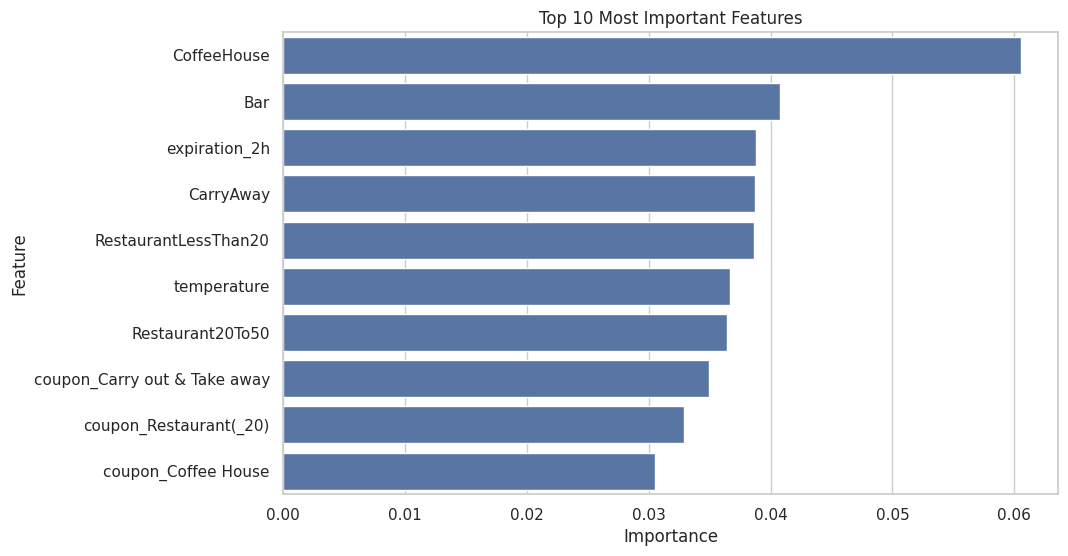

In [ ]:
# Plotting feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Most Important Features')
plt.show()

**Training with XGBoost**

In [ ]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss' )

In [ ]:
# Clean the column names by replacing special characters
X_train.columns = X_train.columns.str.replace('\[', '_', regex=True)
X_train.columns = X_train.columns.str.replace('\]', '_', regex=True)
X_train.columns = X_train.columns.str.replace('<', '_', regex=True)
X_train.columns = X_train.columns.str.replace('>', '_', regex=True)

X_test.columns = X_test.columns.str.replace('\[', '_', regex=True)
X_test.columns = X_test.columns.str.replace('\]', '_', regex=True)
X_test.columns = X_test.columns.str.replace('<', '_', regex=True)
X_test.columns = X_test.columns.str.replace('>', '_', regex=True)

In [ ]:
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:15:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

# **Model Evaluation**

Random Forest Model Evaluation:

Random Forest Accuracy: 0.7414
Random Forest Precision: 0.7450
Random Forest Recall: 0.8126
Random Forest F1 Score: 0.7773


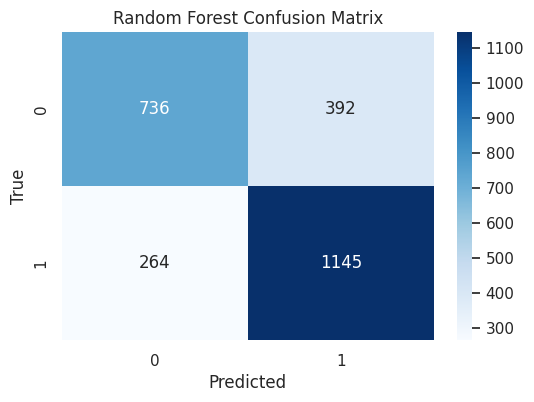

In [ ]:
#Random Forest Evaluation
print("Random Forest Model Evaluation:\n")

y_pred_rf = rf.predict(X_test)

# Accuracy for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.4f}')

# Precision, Recall, F1 Score for Random Forest
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f'Random Forest Precision: {precision_rf:.4f}')
print(f'Random Forest Recall: {recall_rf:.4f}')
print(f'Random Forest F1 Score: {f1_rf:.4f}')

# Confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


XGBoost Model Evaluation:

XGBoost Accuracy: 0.7536
XGBoost Precision: 0.7589
XGBoost Recall: 0.8155
XGBoost F1 Score: 0.7862


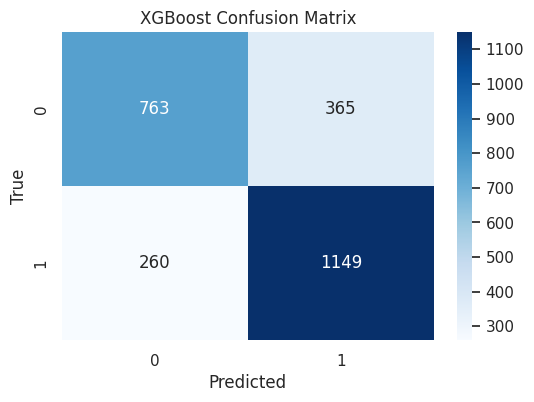

In [ ]:
# XGBoost Model Evaluation
print("\nXGBoost Model Evaluation:\n")

# Predict on the test set using XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Accuracy for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb:.4f}')

# Precision, Recall, F1 Score for XGBoost
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f'XGBoost Precision: {precision_xgb:.4f}')
print(f'XGBoost Recall: {recall_xgb:.4f}')
print(f'XGBoost F1 Score: {f1_xgb:.4f}')

# Confusion matrix for XGBoost
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Comparison:
- Accuracy: XGBoost performs slightly better (0.7536) than Random Forest (0.7414).
- Precision: XGBoost has a higher precision (0.7589) compared to Random Forest (0.7450), meaning fewer false positives.
- Recall: Both models have similar recall, with XGBoost having a slight edge (0.8155 vs. 0.8126), meaning both models are good at identifying positives.
- F1 Score: XGBoost has a higher F1 Score (0.7862 vs. 0.7773), which balances precision and recall.

**Final Model :**
XGBoost performs better across all metrics, though the difference isn't huge. So, we are moving forward with XGBoost model

# **Hypertuning of XGBoost model**

In [ ]:
# Define the parameter grid for Randomized Search
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5]
}

# Setup the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,
    scoring='f1',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the random search model
random_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best Parameters found: ", random_search.best_params_)
print("Best F1 Score: ", random_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters found:  {'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 1.0}
Best F1 Score:  0.7874133306920995


In [ ]:
# Evaluate the tuned model on the test set
best_xgb_model = random_search.best_estimator_
y_pred_xgb_tuned = best_xgb_model.predict(X_test)

# Evaluate the tuned model
accuracy_xgb_tuned = accuracy_score(y_test, y_pred_xgb_tuned)
precision_xgb_tuned = precision_score(y_test, y_pred_xgb_tuned)
recall_xgb_tuned = recall_score(y_test, y_pred_xgb_tuned)
f1_xgb_tuned = f1_score(y_test, y_pred_xgb_tuned)

print(f'XGBoost Tuned Accuracy: {accuracy_xgb_tuned:.4f}')
print(f'XGBoost Tuned Precision: {precision_xgb_tuned:.4f}')
print(f'XGBoost Tuned Recall: {recall_xgb_tuned:.4f}')
print(f'XGBoost Tuned F1 Score: {f1_xgb_tuned:.4f}')

XGBoost Tuned Accuracy: 0.7584
XGBoost Tuned Precision: 0.7639
XGBoost Tuned Recall: 0.8176
XGBoost Tuned F1 Score: 0.7899


# **Cross Validation**

In [ ]:
# Perform cross-validation (e.g., 5-fold CV)
cv_scores = cross_val_score( best_xgb_model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation accuracy scores
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Accuracy: {cv_scores.mean()}')

Cross-Validation Accuracy Scores: [0.68545526 0.65549862 0.64446196 0.6393378  0.69755521]
Mean Accuracy: 0.6644617702171893


# **Feature Importance for XGBoost Model**

<Figure size 1000x800 with 0 Axes>

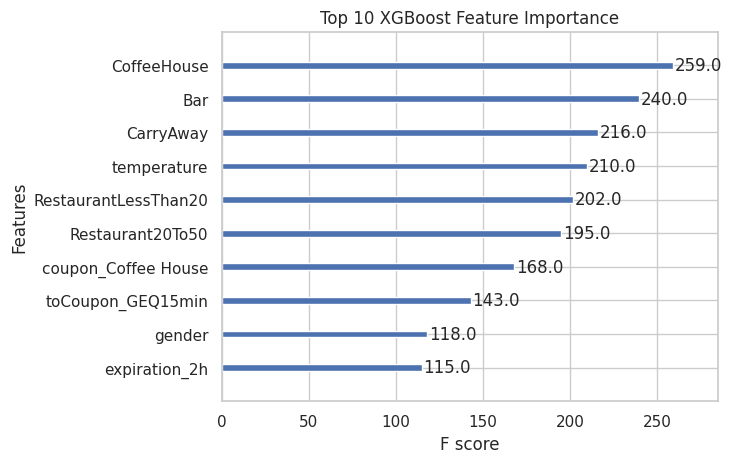

In [ ]:
from xgboost import plot_importance
plt.figure(figsize=(10,8))
plot_importance(xgb_model, max_num_features=10, importance_type='weight')
plt.title('Top 10 XGBoost Feature Importance')
plt.show()

In [ ]:
# Extract feature importance from the XGBoost model
importance = best_xgb_model.get_booster().get_score(importance_type='weight')

# Convert to a DataFrame for easy manipulation
importance_df = pd.DataFrame({
    'Feature': list(importance.keys()),
    'Importance': list(importance.values())
})

# Sort the features by importance and select the top 10
top_10_features = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Print the top 10 features
print("Top 10 Important Features:")
print(top_10_features)

Top 10 Important Features:
                 Feature  Importance
4            CoffeeHouse      3324.0
3                    Bar      3097.0
5              CarryAway      2723.0
6   RestaurantLessThan20      2713.0
7       Restaurant20To50      2416.0
0            temperature      2326.0
22         expiration_2h      1774.0
8      toCoupon_GEQ15min      1725.0
1                 gender      1643.0
19   coupon_Coffee House      1465.0


# **ROC Curve and AUC**

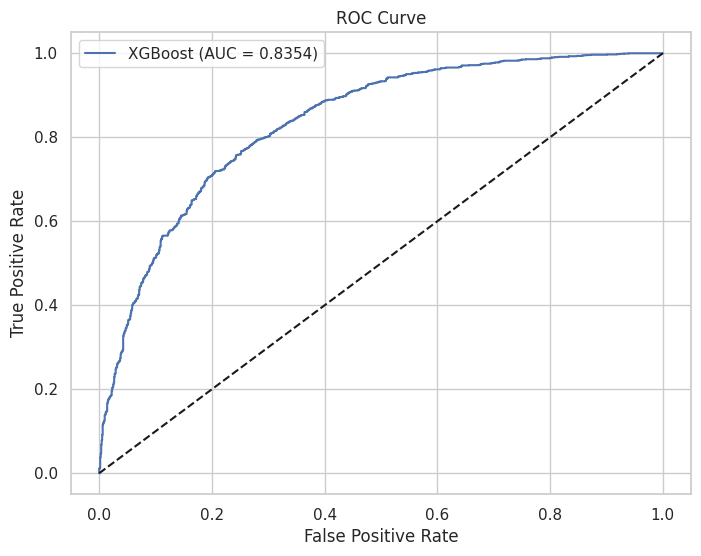

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Get predicted probabilities
y_prob = best_xgb_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc_score:.4f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# **CONCLUSION AND INSIGHTS**

In this project, we aimed to predict coupon acceptance on an e-commerce platform based on various user attributes, driving scenarios, and coupon-related features. After thorough data preprocessing, feature engineering, and model evaluation, we found that the XGBoost model provided the best performance in terms of accuracy and other evaluation metrics. Below is a summary of the steps and findings:

# **Key Results:**

The XGBoost model achieved the following performance metrics after tuning:

**Accuracy**: 75.84%

**Precision**: 76.39%

**Recall**: 81.76%

**F1 Score**: 78.99%

While the improvements post-hyperparameter tuning were marginal, the XGBoost model still performed better than the Random Forest model, making it the preferred choice for this classification task.

# **Top 10 Important Features:**

The model's feature importance analysis highlighted the key factors influencing coupon acceptance. The top 10 most important features in the XGBoost model were:

- **CoffeeHouse**: The frequency of visits to coffeehouses had the highest importance, suggesting that users who frequently visit coffeehouses are more likely to accept coupons.

- **Bar**: Similar to coffeehouses, the frequency of visits to bars also played a significant role in predicting coupon acceptance.

- **CarryAway**: The frequency of ordering takeaway food also strongly influenced whether users would accept a coupon.

- **RestaurantLessThan20**: The number of times a user visited restaurants with an average expense of less than $20 was a critical feature.

- **Restaurant20To50**: Restaurant visits with an expense range of $20 to $50 also contributed notably.

- **Temperature**: The temperature during driving played a role, potentially reflecting user behavior under different weather conditions.

- **Expiration** (2 hours): Coupons with a short expiration time (2 hours) were more likely to be accepted, suggesting that urgency is a key factor.

- **toCoupon_GEQ15min**: The driving distance to the coupon location (greater than 15 minutes) affected acceptance, with shorter distances likely leading to higher acceptance.

- **Gender**: Gender differences also influenced coupon acceptance, with notable differences between male and female users.

- **coupon_Coffee House**: Coupons specifically for coffeehouses were among the most accepted types.

# **Insights and Recommendations:**

- **User Behavior**: The frequency of visits to specific venues like coffeehouses, bars, and restaurants was highly predictive of coupon acceptance. This indicates that tailoring coupon distribution strategies based on user behavior at these locations could improve acceptance rates.

- **Urgency and Distance**: Shorter coupon expiration times and shorter driving distances to the coupon locations increased the likelihood of acceptance. This suggests that targeting users who are closer to the coupon's location and creating a sense of urgency with limited-time offers may be effective strategies.

- **Personalization**: Demographic factors such as gender and behavioral factors (e.g., coffeehouse and restaurant visits) should be considered when designing personalized coupon campaigns to maximize engagement.

# **Conclusion:**

By leveraging the insights from the XGBoost model, e-commerce platforms can optimize their coupon distribution strategies to target the right users at the right time. Personalized and location-aware coupons, combined with urgency, are likely to enhance user engagement and increase coupon acceptance rates.